# v2 training

v2 data 

  {
    "time": 0,
    "classes": [
      {
        "class": "general_not_nsfw_not_suggestive",
        "score": 0.9993004548947556
      },
      {
        "class": "general_nsfw",
        "score": 0.00005515861332392431
      },
      {
        "class": "general_suggestive",
        "score": 0.0006443864919204179
      },
      {
        "class": "no_female_underwear",
        "score": 0.899250297625593
      },
      {
        "class": "yes_female_underwear",
        "score": 0.10074970237440699
      },
      {
        "class": "no_male_underwear",
        "score": 0.9961647811377407
      },
      {
        "class": "yes_male_underwear",
        "score": 0.0038352188622594527
      },
      {
        "class": "no_sex_toy",
        "score": 0.9999999798312891
      },
      {
        "class": "yes_sex_toy",
        "score": 2.0168710930836975e-8
      },
      {
        "class": "no_female_nudity",
        "score": 0.7622752597582456
      },
      {
        "class": "yes_female_nudity",
        "score": 0.23772474024175438
      },
      {
        "class": "no_male_nudity",
        "score": 0.9706443527545361
      },
      {
        "class": "yes_male_nudity",
        "score": 0.029355647245463922
      },
      {
        "class": "no_female_swimwear",
        "score": 0.999611244248107
      },
      {
        "class": "yes_female_swimwear",
        "score": 0.0003887557518931324
      },
      {
        "class": "no_male_shirtless",
        "score": 0.6499119967458475
      },
      {
        "class": "yes_male_shirtless",
        "score": 0.35008800325415235
      },
      {
        "class": "no_text",
        "score": 0.45322065582766496
      },
      {
        "class": "text",
        "score": 0.5467793441723351
      },
      {
        "class": "animated",
        "score": 0.11259401438317206
      },
      {
        "class": "hybrid",
        "score": 0.030002950239859178
      },
      {
        "class": "natural",
        "score": 0.8574030353769687
      },
      {
        "class": "animated_gun",
        "score": 1.2162167936901165e-9
      },
      {
        "class": "gun_in_hand",
        "score": 0.004522403985289621
      },
      {
        "class": "gun_not_in_hand",
        "score": 0.00023331984987421487
      },
      {
        "class": "no_gun",
        "score": 0.9952442749486193
      },
      {
        "class": "culinary_knife_in_hand",
        "score": 5.932730985401978e-9
      },
      {
        "class": "knife_in_hand",
        "score": 0.0018882816682760986
      },
      {
        "class": "knife_not_in_hand",
        "score": 0.003480484685850096
      },
      {
        "class": "no_knife",
        "score": 0.9946312277131428
      },
      {
        "class": "a_little_bloody",
        "score": 0.00020642045767688616
      },
      {
        "class": "no_blood",
        "score": 0.9997831147054382
      },
      {
        "class": "other_blood",
        "score": 9.653595868250288e-7
      },
      {
        "class": "very_bloody",
        "score": 0.00000949947729795773
      },
      {
        "class": "no_pills",
        "score": 0.9999999868927427
      },
      {
        "class": "yes_pills",
        "score": 1.3107257304315686e-8
      },
      {
        "class": "no_smoking",
        "score": 0.9999888406757149
      },
      {
        "class": "yes_smoking",
        "score": 0.000011159324285029952
      },
      {
        "class": "illicit_injectables",
        "score": 0.0014406553701263015
      },
      {
        "class": "medical_injectables",
        "score": 3.68515180826588e-8
      },
      {
        "class": "no_injectables",
        "score": 0.9985593077783557
      },
      {
        "class": "no_nazi",
        "score": 0.9999999899241184
      },
      {
        "class": "yes_nazi",
        "score": 1.0075881556615458e-8
      },
      {
        "class": "no_kkk",
        "score": 0.9999900152198961
      },
      {
        "class": "yes_kkk",
        "score": 0.000009984780103926167
      },
      {
        "class": "no_middle_finger",
        "score": 0.9999998928595047
      },
      {
        "class": "yes_middle_finger",
        "score": 1.0714049516372813e-7
      },
      {
        "class": "no_terrorist",
        "score": 0.9999998805523179
      },
      {
        "class": "yes_terrorist",
        "score": 1.1944768206346446e-7
      }
    ]

## Import required modules

In [205]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import tensorflow_addons as tfa


import pathlib
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import imagenet_utils
from imutils.object_detection import non_max_suppression
from PIL import Image
import scipy
import numpy as np
import argparse
import imutils
import time
import cv2
import requests
from io import BytesIO
from IPython.display import display, Markdown, clear_output
from IPython.display import Image as IImage 
import ipywidgets as widgets
from PIL import ImageFilter
import os
import uuid

## Main functions

In [134]:
def sliding_window(image, step, ws):
    # slide a window across the image
    for y in range(0, image.shape[0] - ws[1], step):
        for x in range(0, image.shape[1] - ws[0], step):
            # yield the current window
            yield (x, y, image[y:y + ws[1], x:x + ws[0]])
            
def image_pyramid(image, scale=1.5, minSize=(224, 224)):
    # yield the original image
    yield image
    # keep looping over the image pyramid
    while True:
        # compute the dimensions of the next image in the pyramid
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        # yield the next image in the pyramid
        yield image
        
def sub_plot_images(image, title,elem_place=1,show = True, figsize=(1, 1), plt_hspace = 0.8, vertical=1, horizontal=5):
    if show:
        if not figsize == (1, 1):
            plt.figure(figsize=figsize)

        plt.subplot(vertical,horizontal,elem_place)
        plt.subplots_adjust(hspace = plt_hspace)
        plt.title(title)
        plt.imshow(image)
        
        
def detect_adult_picture_from_url(url, prod=True, pass_neutral=True, figsize=(30, 30), WIDTH = 600, PYR_SCALE = 1.5, WIN_STEP = 16, ROI_SIZE = (250, 250), INPUT_SIZE = (224, 224), probaLimit = 0.5):
    req = requests.get(url, stream=True)
    image = np.asarray(bytearray(req.content), dtype="uint8")
    imageBGR = cv2.imdecode(image, cv2.IMREAD_COLOR)
    imageRGB = cv2.cvtColor(imageBGR , cv2.COLOR_BGR2RGB)
    detect_adult_picture(imageRGB, prod, pass_neutral, figsize, WIDTH, PYR_SCALE, WIN_STEP, ROI_SIZE, INPUT_SIZE, probaLimit)
    """
    image = Image.open(requests.get(url, stream=True).raw)

    image_loaded = tf.keras.preprocessing.image.img_to_array(image)
    
    detect_adult_picture(image_loaded/255, prod, plotprocess)
    """
    
def predict_from_file_url(count_start=0, count_set = 10, src="validation-adult.txt"):
    figsize = (40, 40)
    image_input_file = open(src, "r")
    image_input_file = [image_input_fileS for image_input_fileS in image_input_file]
    total = len(image_input_file)
    
    for url in image_input_file[count_start:count_set]:
        try:
            detect_adult_picture_from_url(url, True, False)
        except Exception as wrong: 
            pass
        
def detect_adult_picture_from_array(array, prod=True, pass_neutral=True, figsize=(30, 30), WIDTH = 600, PYR_SCALE = 1.5, WIN_STEP = 16, ROI_SIZE = (250, 250), INPUT_SIZE = (224, 224), probaLimit = 0.5):
    detect_adult_picture(array, prod, pass_neutral, figsize, WIDTH, PYR_SCALE, WIN_STEP, ROI_SIZE, INPUT_SIZE, probaLimit)


def calculate_average(pred):
    if pred == 0:
        return 1
    elif pred < 0.5 and pred !=0:
        return (0.5-pred)/0.5
    elif pred >= 0.5 and pred !=1:
         return (pred-0.5)/0.5
    else:
        return 1
    
def decode_prediction(predictions):
    decoded_class_index = []
    decode_prediction_precision = []
    
    for prediction in predictions:
        result = 0 if prediction < 0.5 else 1
        precision = calculate_average(prediction)
        decoded_class_index.append(result)
        decode_prediction_precision.append(precision)
    return np.array(decoded_class_index), np.array(decode_prediction_precision),predictions


def detect_adult_picture(image, prod=True, pass_neutral=True, figsize=(30, 30), WIDTH = 600, PYR_SCALE = 1.5, WIN_STEP = 16, ROI_SIZE = (250, 250), INPUT_SIZE = (224, 224), probaLimit = 0.5):
    plt.figure(figsize=figsize)
    orig = image
    scanned = orig.copy()
    neutral = scanned
    orig = imutils.resize(orig, width=WIDTH)
    
    sub_plot_images(orig, "input", 1, prod)

    
    (H, W) = orig.shape[:2]
    pyramid = image_pyramid(orig, scale=PYR_SCALE, minSize=ROI_SIZE)
    # initialize two lists, one to hold the ROIs generated from the image
    # pyramid and sliding window, and another list used to store the
    # (x, y)-coordinates of where the ROI was in the original image
    rois = []
    locs = []
    # time how long it takes to loop over the image pyramid layers and
    # sliding window locations
    start = time.time()
    for image in pyramid:
    # determine the scale factor between the *original* image
    # dimensions and the *current* layer of the pyramid
        scale = W / float(image.shape[1])
        # for each layer of the image pyramid, loop over the sliding
        # window locations
        for (x, y, roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):
            # scale the (x, y)-coordinates of the ROI with respect to the
            # *original* image dimensions
            x = int(x * scale)
            y = int(y * scale)
            w = int(ROI_SIZE[0] * scale)
            h = int(ROI_SIZE[1] * scale)
            # take the ROI and preprocess it so we can later classify
            # the region using Keras/TensorFlow
            roi = cv2.resize(roiOrig, INPUT_SIZE)
            roi = img_to_array(roi)
            roi = preprocess_input(roi)
            # update our list of ROIs and associated coordinates
            rois.append(roi)
            locs.append((x, y, x + w, y + h))
    end = time.time()
    print("[INFO] looping over pyramid/windows took {:.5f} seconds".format(
        end - start))
    # convert the ROIs to a NumPy array
    rois = np.array(rois, dtype="float32")
    # classify each of the proposal ROIs using ResNet and then show how
    # long the classifications took
    print("[INFO] classifying ROIs...")
    start = time.time()
    preds = model.predict(rois)
    end = time.time()
    print("[INFO] classifying ROIs took {:.5f} seconds".format(
        end - start))
    # decode the predictions and initialize a dictionary which maps class
    # labels (keys) to any ROIs associated with that label (values)
    #preds = tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=5)
    labels = {}
    count = 0
    tot = len(preds)
    probaLimit = 0.5

    for i in range(0, tot):
        label = class_names[int(np.argmax(preds[count], axis=-1))]
        prob = 1
        if prob >= probaLimit:
            box = locs[i]
            L = labels.get(label, [])
            L.append((box, prob))
            labels[label] = L
        count+=1
        
    for label in labels.keys():
        # clone the original image so that we can draw on it
        print("[INFO] showing results for '{}'".format(label))
        clone = orig.copy()
        # loop over all bounding boxes for the current label
        for (box, prob) in labels[label]:
            # draw the bounding box on the image
            (startX, startY, endX, endY) = box
            cv2.rectangle(clone, (startX, startY), (endX, endY),
                (0, 255, 0), 2)
        # show the results *before* applying non-maxima suppression, then
        # clone the image again so we can display the results *after*
        # applying non-maxima suppression
        #plt.imshow(clone)
        clone = orig.copy()
    # extract the bounding boxes and associated prediction
    # probabilities, then apply non-maxima suppression
    boxes = np.array([p[0] for p in labels[label]])
    proba = np.array([p[1] for p in labels[label]])
    boxes = non_max_suppression(boxes, proba)
    # loop over all bounding boxes that were kept after applying
    # non-maxima suppression
    
    
    for (startX, startY, endX, endY) in boxes:
        # draw the bounding box and label on the image
        cv2.rectangle(scanned, (startX, startY), (endX, endY),
            (0, 255, 0), 2)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(scanned, label, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)
        # show the output after apply non-maxima suppression
        
    sub_plot_images(scanned, "scanned", 2, prod)
    
    for (startX, startY, endX, endY) in boxes:
        if label=="neutral":
            pass
        else:
            topLeft =  (startX, startY)
            bottomRight = (endX, endY)
            x, y = topLeft[0], topLeft[1]
            w, h = bottomRight[0] - topLeft[0], bottomRight[1] - topLeft[1]

            # Grab ROI with Numpy slicing and blur
            ROI = clone[y:y+h, x:x+w]
            blur = cv2.GaussianBlur(ROI, (51,51), 50) 
            clone[y:y+h, x:x+w] = blur
            
    sub_plot_images(clone, "output", 3, prod)
    
    
def detect_adult_picture_no_plot(image, prod=True, pass_neutral=True, figsize=(30, 30), WIDTH = 600, PYR_SCALE = 1.5, WIN_STEP = 16, ROI_SIZE = (250, 250), INPUT_SIZE = (224, 224), probaLimit = 0.8, ksize = (51,51)):
    
    main_ids, main_probs, main_preds =  decode_prediction(model.predict(np.array([cv2.resize(image, INPUT_SIZE)])))
    if main_probs[0] > probaLimit :
        return cv2.blur(image, ksize) 
    
    orig = image
    copy = orig.copy()
    orig = imutils.resize(orig, width=WIDTH)
    
    (H, W) = orig.shape[:2]
    pyramid = image_pyramid(orig, scale=PYR_SCALE, minSize=ROI_SIZE)
    # initialize two lists, one to hold the ROIs generated from the image
    # pyramid and sliding window, and another list used to store the
    # (x, y)-coordinates of where the ROI was in the original image
    rois = []
    locs = []
    # time how long it takes to loop over the image pyramid layers and
    # sliding window locations
    start = time.time()
    for image in pyramid:
    # determine the scale factor between the *original* image
    # dimensions and the *current* layer of the pyramid
        scale = W / float(image.shape[1])
        # for each layer of the image pyramid, loop over the sliding
        # window locations
        for (x, y, roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):
            # scale the (x, y)-coordinates of the ROI with respect to the
            # *original* image dimensions
            x = int(x * scale)
            y = int(y * scale)
            w = int(ROI_SIZE[0] * scale)
            h = int(ROI_SIZE[1] * scale)
            # take the ROI and preprocess it so we can later classify
            # the region using Keras/TensorFlow
            roi = cv2.resize(roiOrig, INPUT_SIZE)
            roi = img_to_array(roi)
            roi = preprocess_input(roi)
            # update our list of ROIs and associated coordinates
            rois.append(roi)
            locs.append((x, y, x + w, y + h))
    end = time.time()
    print("[INFO] looping over pyramid/windows took {:.5f} seconds".format(
        end - start))
    # convert the ROIs to a NumPy array
    rois = np.array(rois, dtype="float32")
    # classify each of the proposal ROIs using ResNet and then show how
    # long the classifications took
    print("[INFO] classifying ROIs...")
    start = time.time()
    preds = model.predict(rois)
    end = time.time()
    print("[INFO] classifying ROIs took {:.5f} seconds".format(
        end - start))
    # decode the predictions and initialize a dictionary which maps class
    # labels (keys) to any ROIs associated with that label (values)
    #preds = tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=5)
    labels = {}
    tot = len(preds)
    probaLimit = 0.5

    for i in range(0, tot):
        label = class_names[int(preds[i])]
        prob = 1
        box = locs[i]
        L = labels.get(label, [])
        L.append((box, prob))
        labels[label] = L
        
    for label in labels.keys():
        # clone the original image so that we can draw on it
        print("[INFO] showing results for '{}'".format(label))
        clone = orig.copy()
        # loop over all bounding boxes for the current label
        for (box, prob) in labels[label]:
            # draw the bounding box on the image
            (startX, startY, endX, endY) = box
            cv2.rectangle(clone, (startX, startY), (endX, endY),
                (0, 255, 0), 2)
        # show the results *before* applying non-maxima suppression, then
        # clone the image again so we can display the results *after*
        # applying non-maxima suppression
        #plt.imshow(clone)
        clone = orig.copy()
    # extract the bounding boxes and associated prediction
    # probabilities, then apply non-maxima suppression
    boxes = np.array([p[0] for p in labels[label]])
    proba = np.array([p[1] for p in labels[label]])
    boxes = non_max_suppression(boxes, proba)
    # loop over all bounding boxes that were kept after applying
    # non-maxima suppression
    
    
    for (startX, startY, endX, endY) in boxes:
        if label=="neutral":
            pass
        else:
            topLeft =  (startX, startY)
            bottomRight = (endX, endY)
            x, y = topLeft[0], topLeft[1]
            w, h = bottomRight[0] - topLeft[0], bottomRight[1] - topLeft[1]

            # Grab ROI with Numpy slicing and blur
            ROI = clone[y:y+h, x:x+w]
            blur = cv2.GaussianBlur(ROI, (51,51), 50) 
            clone[y:y+h, x:x+w] = blur
            
    return clone





def predict_batch(images):
    predicted_indexes, confidences, predictions = decode_prediction(model.predict(np.array(images)))
    predicted_labels = []
    for predicted_index in predicted_indexes:
        #print(predictions[i])
        predicted_labels.append(class_names[predicted_index])
        
    return predicted_labels, confidences, predicted_indexes


def predict_from_txt_urls(src='test-urls.txt', start=0, limit=10, figsize=(30, 30), verbose=False):
    urls = []
    
    with open(src) as f:
        lines = [line.rstrip() for line in f]
        tot = len(lines)
        count = 0
        for url in lines[start:limit]:
            count+=1
            urls.append(url)
            try:
                if verbose:
                    print(count, "/", tot, "dwd => ", url)
                
            except Exception as wrong:
                if verbose:
                    print(count, "/", tot, "error => ",wrong)
                pass

    predict_from_urls(urls, figsize=figsize, verbose=verbose)
        
        
def predict_from_urls(urls, figsize=(30, 30), verbose=False):
    images = []
    tot = len(urls)
    count=0
    for url in urls:
            count+=1
            try:
                if verbose:
                    print(count, "/", tot, "dwd => ", url)
                req = requests.get(url, stream=True)
                image = np.asarray(bytearray(req.content), dtype="uint8")
                imageBGR = cv2.imdecode(image, cv2.IMREAD_COLOR)
                imageRGB = cv2.cvtColor(imageBGR , cv2.COLOR_BGR2RGB)

                images.append(cv2.resize(imageRGB, dimensions, interpolation = cv2.INTER_AREA)/255)
            except Exception as wrong:
                if verbose:
                    print(count, "/", tot, "error => ",wrong)
                pass
    predicted_labels, confidences, predicted_indexes = predict_batch(np.array(images))
    
    rangeTot = len(images)

    plt.figure(figsize=figsize)
    if len(images) == 1:
        plt.title(predicted_labels[0]+" "+str(confidences[0]))
        plt.imshow(images[0])
    else:  
        for i in range(rangeTot):
            plt.subplot(rangeTot,int((rangeTot)/2),i+1)
            plt.subplots_adjust(hspace = 0.8)
            #color = "blue" if predicted_ids[i] == label_batch[i] else "red"
            plt.title(predicted_labels[i]+" "+str(confidences[i]))#, color=color)
            #plt.imshow(images[i]/255 if predicted_labels[i]=="neutral" else ndimage.gaussian_filter(images[i]/255, sigma=2))
            plt.imshow(images[i])
            
def clean_up_data_dir():
    data_sub_directories = os.listdir(data_dir)
    for data_sub_directory in data_sub_directories:
        path_to_delete = os.path.join(data_dir, data_sub_directory, ".*")
        !rm -r $path_to_delete

    !rm -r $data_dir/.ipynb_checkpoints
    !rm -r $data_dir/.DS_Store
    

### Defining main variables

In [208]:
IMAGE_RES = 224
dimensions = (IMAGE_RES, IMAGE_RES)
batch_size = 32
data_dir = "images_new"

### Datset Summary

In [209]:
clean_up_data_dir()
data_sub_directories = os.listdir(data_dir)
for data_sub_directory in data_sub_directories:
    print("found {0} for class {1}".format(len(os.listdir(os.path.join(data_dir, data_sub_directory))), data_sub_directory))

zsh:1: no matches found: images_new/male_shirtless/.*
zsh:1: no matches found: images_new/general_not_nsfw_not_suggestive/.*
zsh:1: no matches found: images_new/male_underware/.*
zsh:1: no matches found: images_new/female_nudity/.*
zsh:1: no matches found: images_new/female_swimwear/.*
zsh:1: no matches found: images_new/general_nsfw/.*
rm: images_new/.ipynb_checkpoints: No such file or directory
rm: images_new/.DS_Store: No such file or directory
found 435 for class male_shirtless
found 2107 for class general_not_nsfw_not_suggestive
found 153 for class male_underware
found 798 for class female_nudity
found 927 for class female_swimwear
found 933 for class general_nsfw


### LOAD TRAINING DATASET

In [210]:
clean_up_data_dir()

train_datagen = ImageDataGenerator(rescale=1./255,
    #rotation_range=10,
    #brightness_range=[0.2,1.2],
    #shear_range=0.2,
    #zoom_range=0.4,
    #horizontal_flip=True,
    validation_split=0.2) # set validation split




training_set = train_datagen.flow_from_directory(
    data_dir,
    target_size=dimensions,
    batch_size=batch_size,
    # class_mode='categorical',
    class_mode='sparse',
    subset='training') # set as training data

validation_set = train_datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=dimensions,
    batch_size=batch_size,
    # class_mode='categorical',
    class_mode='sparse',
    subset='validation') # set as validation data

class_names = list(training_set.class_indices)
num_classes = len(class_names)
files_per_class = []
for folder in os.listdir(data_dir):
    if not os.path.isfile(folder):
            files_per_class.append(len(os.listdir(data_dir + '/' + folder)))
total_files = sum(files_per_class)
class_weights = {}
for i in range(len(files_per_class)):
    class_weights[i] = 1 - (float(files_per_class[i]) / total_files)
print (class_weights)


zsh:1: no matches found: images_new/male_shirtless/.*
zsh:1: no matches found: images_new/general_not_nsfw_not_suggestive/.*
zsh:1: no matches found: images_new/male_underware/.*
zsh:1: no matches found: images_new/female_nudity/.*
zsh:1: no matches found: images_new/female_swimwear/.*
zsh:1: no matches found: images_new/general_nsfw/.*
rm: images_new/.ipynb_checkpoints: No such file or directory
rm: images_new/.DS_Store: No such file or directory
Found 4279 images belonging to 6 classes.
Found 1066 images belonging to 6 classes.
{0: 0.9187371567345414, 1: 0.6063889407808705, 2: 0.9714178965066318, 3: 0.8509247151130207, 4: 0.8268260788342985, 5: 0.825705212030637}


###  IMPORT BASE MODEL

In [211]:
# URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
URL = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES, 3))

### Freeze the Pre-Trained Model

In [212]:
feature_extractor.trainable = False

### Attach a classification head

In [241]:
model = tf.keras.Sequential([
    feature_extractor,
    # layers.Dense(num_classes, activation="softmax")
    layers.Dense(num_classes, activation="softmax")
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_9 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 12294     
Total params: 21,815,078
Trainable params: 12,294
Non-trainable params: 21,802,784
_________________________________________________________________


### Compile new model

In [252]:
# model.compile(
#   metrics=[tf.keras.metrics.AUC(name='prc', curve='PR')],
#   # optimizer=tf.keras.optimizers.RMSprop(lr=0.01), 
#   optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4),
#   loss = tf.keras.losses.SparseCategoricalCrossentropy())

# model.compile(
#   optimizer="adam",#tf.keras.optimizers.Adam(learning_rate=0.001),
#   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#   metrics=["accuracy"]
#   )

  #, tfa.metrics.F1Score(num_classes=num_classes, threshold=0.5)


model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=["accuracy"])


### Train new model

In [253]:
EPOCHS = 10 #30
# steps_per_epoch = num_classes//batch_size
checkpoint_filepath = 'models/epoch/chk.h5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy', #'val_prc',
    mode='max',
    save_best_only=True)

stop_training_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",

    #min_delta=0,
    patience=3,
    #verbose=0,
    #mode="auto",
    #baseline=None,
    #restore_best_weights=False,
)

history = model.fit(training_set,
                    epochs=EPOCHS,
                    # steps_per_epoch=steps_per_epoch,
                    validation_data=validation_set,
                    callbacks=[model_checkpoint_callback, stop_training_callback],
                    class_weight=class_weights
                    )

Epoch 1/10
 15/134 [==>...........................] - ETA: 1:18 - loss: 1.3293 - accuracy: 0.4500

### load model best weight

In [ ]:
model.load_weights(checkpoint_filepath)

### display training history

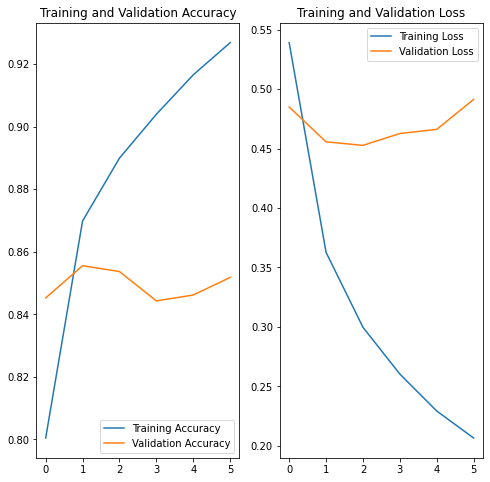

In [162]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, acc, label='Training Accuracy')
plt.plot(history.epoch, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.epoch, loss, label='Training Loss')
plt.plot(history.epoch, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### visualize dataset

In [163]:
%matplotlib inline
current  =  0
clean_up_data_dir()
images_path = []
data_sub_directories = os.listdir(data_dir)
for data_sub_directory in data_sub_directories:
    # images_path+=os.listdir(os.path.join(data_dir, data_sub_directory))
    for current_dir in os.listdir(os.path.join(data_dir, data_sub_directory)):
        images_path.append(os.path.join(data_sub_directory, current_dir))

next_button = widgets.Button(description='Next')
prev_button = widgets.Button(description='Prev')
class_names = os.listdir(data_dir)
moving_paths = []
output = widgets.Output()
display(prev_button, next_button, output)

def on_next_button_clicked(_):
    global current
    if current+2 > len(images_path):
        return None
    with output:
        current+=1
        clear_output()
        print("{0}/{1}".format(current+1, len(images_path)))
        pil_img = IImage(filename=os.path.join(data_dir, images_path[current]), width = dimensions[0], height=dimensions[1])
        display(pil_img)

def on_prev_button_clicked(_):
    global current
    if current-1 < 0:
        return None
    with output:
        current-=1
        clear_output()
        print("{0}/{1}".format(current+1, len(images_path)))
        pil_img = IImage(filename=os.path.join(data_dir, images_path[current]), width = dimensions[0], height=dimensions[1])
        display(pil_img)

next_button.on_click(on_next_button_clicked)
prev_button.on_click(on_prev_button_clicked)


zsh:1: no matches found: images_new/male_shirtless/.*
zsh:1: no matches found: images_new/.DS_Store/.*
zsh:1: no matches found: images_new/general_not_nsfw_not_suggestive/.*
zsh:1: no matches found: images_new/female_nudity/.*
zsh:1: no matches found: images_new/female_swimwear/.*
zsh:1: no matches found: images_new/general_nsfw/.*
rm: images_new/.ipynb_checkpoints: No such file or directory


Button(description='Prev', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

Output()

### save model

In [153]:
import time

t = time.time()

export_path_keras = "models/{}.h5".format(int(t))
#export_path_keras = "models/{}.h5".format("current-model-best-weight")
print(export_path_keras)

model.save(export_path_keras)

models/1642608117.h5


### load model

In [ ]:
export_path_keras = "models/1625175782.h5"
#1624998901
#export_path_keras = "models/first-good-model.h5"
model = tf.keras.models.load_model(
  export_path_keras, 
  # `custom_objects` tells keras how to load a `hub.KerasLayer`
  custom_objects={'KerasLayer': hub.KerasLayer})

model.summary()

### Sample image prediction

In [189]:
def calculate_average(pred):
    if pred == 0:
        return 1
    elif pred < 0.5 and pred !=0:
        return (0.5-pred)/0.5
    elif pred >= 0.5 and pred !=1:
         return (pred-0.5)/0.5
    else:
        return 1
    
def decode_prediction(predictions):
    decoded_class_index = []
    decode_prediction_precision = []
    predictions_data = [] 

    numpy_predictions = predictions.numpy()
    
    for prediction in numpy_predictions:
        prediction_data= {}
        for i in range(0, len(prediction)):
            prediction_data[class_names[i]] = prediction[i]
            predictions_data.append(prediction_data)

    print("tensor => ", predictions[0])
    print("numpy => ", numpy_predictions[0])
    print("prediction_data => ", predictions_data[0])
   
    
            # print()
    #     result = 0 if prediction < 0.5 else 1
    #     precision = calculate_average(prediction)
    #     decoded_class_index.append(result)
    #     decode_prediction_precision.append(precision)
    # return np.array(decoded_class_index), np.array(decode_prediction_precision),predictions



image_batch, label_batch = next(iter(validation_set))
label_batch = label_batch.astype(int)

predicted_batch = model.predict(image_batch)
#interpretation_batch = tf.keras.applications.mobilenet.decode_predictions(predicted_batch)
#print(interpretation_batch)
predicted_batch = tf.squeeze(predicted_batch)#.numpy()

decode_prediction(predicted_batch)
# predicted_ids , precisions, preds = decode_prediction(predicted_batch)

# predicted_class_names = []
# for i in predicted_ids:
#     predicted_class_names.append(class_names[i])
    
# print("Labels:           ", label_batch)
# print("Predicted labels: ", predicted_ids)
# print("precisions : ", precisions)

# cfs_matrix = tf.math.confusion_matrix(
#     label_batch, predicted_ids, num_classes=num_classes
# )
# 0.6213079

tensor =>  tf.Tensor([-3.8986447 -4.897027   4.175486  -4.6594253 -6.8515882 -9.304119 ], shape=(6,), dtype=float32)
numpy =>  [-3.8986447 -4.897027   4.175486  -4.6594253 -6.8515882 -9.304119 ]
prediction_data =>  {'male_shirtless': -3.8986447, 'general_not_nsfw_not_suggestive': -4.897027, 'male_underware': 4.175486, 'female_nudity': -4.6594253, 'female_swimwear': -6.8515882, 'general_nsfw': -9.304119}


### save model for embeded devices

In [ ]:
import tensorflowjs as tfjs
from datetime import datetime
output_path = 'models/embeded/{}'.format(datetime.now())
!mkdir $output_path
tfjs.converters.save_keras_model(model, output_path)

In [ ]:
version = 5

In [ ]:
save_dir = "models/holypics/"+str(version)

In [ ]:
#save_dir = "shared/models/holypics/"+str(version)
#!rm -r $save_dir

In [ ]:
@tf.function
def decode_img_bytes(img):
    img = tf.strings.regex_replace(img, "\+", "-")
    img = tf.strings.regex_replace(img, "\/", "_")
    image = tf.image.decode_jpeg(tf.io.decode_base64(img), channels=3)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32) # 0-1
    image = tf.image.resize(images=image, size=dimensions)
    return image

In [ ]:
import base64

class ExportModel(tf.keras.Model):
    def __init__(self, model):
        super().__init__(self)       
        self.model = model

    @tf.function(input_signature=[
        tf.TensorSpec(shape=(None,), dtype=tf.string, name="base64")
    ])
    
    def serving_fn(self, base64):
        #a = np.array([x.lower() if isinstance(x, str) else x for x in arr])
        base64_image = tf.map_fn(lambda x: decode_img_bytes(x), base64, fn_output_signature=tf.float32)
        preds = self.model(base64_image)
        
        return {
            #'base_64': base64,
            'prediction': preds
            #'precisions': prediction_precision
        }

    def save(self, export_path):
        sigs = {
            'serving_default' : self.serving_fn
        }
        
        #tf.keras.backend.set_learning_phase(0) # inference only
        tf.saved_model.save(self, export_path, signatures=sigs)
sm = ExportModel(model)
sm.save(save_dir)

In [ ]:
import base64

class ExportModel(tf.keras.Model):
    def __init__(self, model):
        super().__init__(self)       
        self.model = model

    @tf.function(input_signature=[
        tf.TensorSpec(shape=(None,), dtype=tf.string, name="base64")
    ])
    
    def serving_fn(self, base64):
        #a = np.array([x.lower() if isinstance(x, str) else x for x in arr])
        base64_image = tf.map_fn(lambda x: decode_img_bytes(x), base64, fn_output_signature=tf.float32)
        preds = self.model(base64_image)
        with tf.compat.v1.Session() as sess:
            print(sess.run(preds))

        return {
            #'base_64': base64,
            'prediction': preds
            #'precisions': prediction_precision
        }

    def save(self, export_path):
        sigs = {
            'serving_default' : self.serving_fn
        }
        
        #tf.keras.backend.set_learning_phase(0) # inference only
        tf.saved_model.save(self, export_path, signatures=sigs)
sm = ExportModel(model)
sm.save(save_dir)

### Send deployement files to host

In [ ]:
import requests
import os

url = "http://ml.megamaxdevelopment.tech/uploader.php"

payload = {'key': "tfdmhdsus", 'path': 'ml.megamaxdevelopment.tech/holypics/'}

file = 'models/shared/shared.zip'#'models/shared/shared.zip'

files = {'uploaded_file': (os.path.basename(file), open(file, 'rb'), 'application/octet-stream')}

r = requests.post(url, files=files, data=payload)

print(r.content)

### last deployement instructions

<ul>
    <li>sudo sh deploy.sh version (host)</li>
    <li>sudo sh deploy.sh version (host)</li>
    <li>docker-compose up (host)</li>
</ul>

### Test server

## Preview model performances on dataset

### main processing functions

In [18]:
import cv2

%pylab inline

from IPython.display import clear_output

def get_image_from_video(path= "assets/normal-1.mp4", start_frame = -1, sequences_number = 50):
    cap = cv2.VideoCapture(path)
    count = 0
    image = np.asarray([]);
    try:
        while True:
            if start_frame!=-1 and count < start_frame:
                count+=1
                pass
            else:
                ret, frame = cap.read()
                height, width, _ = frame.shape

                # Extract Region of interest
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #frame[340: 720,500: 800]
                """decoded_class_index, decoded_prediction_precision,predictions = decode_prediction(model.predict(np.array([cv2.resize(image, dimensions, interpolation = cv2.INTER_AREA)/255])))
                print(decoded_class_index[0])
                if decoded_class_index[0] == 0:
                    image = cv2.GaussianBlur(image, (51,51), 50) """
                    
                count+=1
                clear_output(wait=True)
                imshow(image)
                show()
                if sequences_number !=-1 :
                    if count == sequences_number:
                        break

    except KeyboardInterrupt:
        # Release the Video Device
        cap.release()
        # Message to be displayed after releasing the device
        print("Released Video Resource")
    return image


def process_video(src = "assets/sex-4.mp4", count = 0, limit = 50, hard = True, winStride =(4, 4),padding=(8, 8), scale=1.05):
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    
    # open webcam video stream
    
    cap = cv2.VideoCapture(src)

    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()
        height, width, _ = frame.shape

        # Extract Region of interest
        ROI = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        decoded_class_index, decoded_prediction_precision,predictions = decode_prediction(model.predict(np.array([cv2.resize(ROI, dimensions, interpolation = cv2.INTER_AREA)/255])))
        if decoded_class_index[0]==0:
            # resizing for faster detection
            # using a greyscale picture, also for faster detection
            if not hard:
                (rects, weights) = hog.detectMultiScale(ROI, winStride=winStride, padding=padding, scale=scale)

                # draw the original bounding boxes
                for (x, y, w, h) in rects:
                    decoded_class_index, decoded_prediction_precision,predictions = decode_prediction(model.predict(np.array([cv2.resize(ROI[y:y+h, x:x+w], dimensions, interpolation = cv2.INTER_AREA)/255])))
                    if decoded_class_index[0]==0:
                    #blur = cv2.GaussianBlur(ROI, (51,51), 50) 
                        copy = ROI[y:y+h, x:x+w]
                        blur = cv2.GaussianBlur(copy, (51,51), 50) 
                        ROI[y:y+h, x:x+w] = blur

                        #cv2.rectangle(ROI, (x, y), (x + w, y + h), (0, 0, 255), 2)

                # apply non-maxima suppression to the bounding boxes using a
                # fairly large overlap threshold to try to maintain overlapping
                # boxes that are still people
                rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
                pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
                # draw the final bounding boxes
                for (xA, yA, xB, yB) in pick:
                    copy = ROI[yA:yB, xA:xB]
                    blur = cv2.GaussianBlur(copy, (51,51), 50) 
                    ROI[yA:yB, xA:xB] = blur
                    #cv2.rectangle(ROI, (xA, yA), (xB, yB), (0, 255, 0), 2)
            else:
                 ROI = cv2.GaussianBlur(ROI, (51,51), 50) 

        clear_output(wait=True)
        imshow(ROI)
        show()


        if limit !=-1 and count == limit:
            break
        count+=1
        
        
def parallel_process_video(src = "assets/sex-4.mp4",inline = True, figsize = (30, 30), count = 0, limit = 50, hard = True, winStride =(4, 4),padding=(8, 8), scale=1.05):
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    
    # open webcam video stream
    
    cap = cv2.VideoCapture(src)

    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()
        height, width, _ = frame.shape

        # Extract Region of interest
        ROI = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        COPY = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        decoded_class_index, decoded_prediction_precision,predictions = decode_prediction(model.predict(np.array([cv2.resize(ROI, dimensions, interpolation = cv2.INTER_AREA)/255])))
        if decoded_class_index[0]==0:
            # resizing for faster detection
            # using a greyscale picture, also for faster detection
            if not hard:
                (rects, weights) = hog.detectMultiScale(ROI, winStride=winStride, padding=padding, scale=scale)

                # draw the original bounding boxes
                for (x, y, w, h) in rects:
                    decoded_class_index, decoded_prediction_precision,predictions = decode_prediction(model.predict(np.array([cv2.resize(ROI[y:y+h, x:x+w], dimensions, interpolation = cv2.INTER_AREA)/255])))
                    if decoded_class_index[0]==0:
                    #blur = cv2.GaussianBlur(ROI, (51,51), 50) 
                        copy = ROI[y:y+h, x:x+w]
                        blur = cv2.GaussianBlur(copy, (51,51), 50) 
                        ROI[y:y+h, x:x+w] = blur

                        #cv2.rectangle(ROI, (x, y), (x + w, y + h), (0, 0, 255), 2)

                # apply non-maxima suppression to the bounding boxes using a
                # fairly large overlap threshold to try to maintain overlapping
                # boxes that are still people
                rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
                pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
                # draw the final bounding boxes
                for (xA, yA, xB, yB) in pick:
                    copy = ROI[yA:yB, xA:xB]
                    blur = cv2.GaussianBlur(copy, (51,51), 50) 
                    ROI[yA:yB, xA:xB] = blur
                    #cv2.rectangle(ROI, (xA, yA), (xB, yB), (0, 255, 0), 2)
            else:
                 ROI = cv2.GaussianBlur(ROI, (51,51), 50) 
        
        if inline:
            clear_output(wait=True)
            """plt.subplot(vertical,horizontal,elem_place)
            plt.subplots_adjust(hspace = plt_hspace)
            plt.title(title)
            plt.imshow(image)"""
            plt.figure(figsize=figsize)
            subplot(1,2,1)
            title("neutral")
            imshow(COPY)
            subplot(1,2,2)
            title("processed")
            imshow(ROI)
            show()
        else:
            cv2.imshow("neutral", COPY)
            cv2.imshow("processed", ROI)


        if limit !=-1 and count == limit:
            break
        count+=1
        
        
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
def local_video_preprocess(videoPath, hard=True,log=False,saveFrame = True, video_title="", winStride =(4, 4),padding=(8, 8), scale=1.05, overlapThresh=0.65, probs=None, size = (0, 0)):
    frames = []
    cap = cv2.VideoCapture(videoPath)
    
        
        #cap.set(cv2.CAP_PROP_FPS, 25)
    # Check if camera opened successfully
    if (cap.isOpened()== False): 
        print("Error opening video stream or file")
    if not size == (0,0):
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, size[0])
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, size[1])
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    # Read until video is completed
    while(cap.isOpened()):
        
            
      # Capture frame-by-frame
        ret, frame = cap.read()
        try:
                height, width, _ = frame.shape
   
        except Exception as wrong: 
            pass
        
        

        # Extract Region of interest
        
        if ret == True:
            ENDROI = frame
            ROI = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            decoded_class_index, decoded_prediction_precision,predictions = decode_prediction(model.predict(np.array([cv2.resize(ROI, dimensions, interpolation = cv2.INTER_AREA)/255])))
            if decoded_class_index[0]==0:
            # resizing for faster detection
            # using a greyscale picture, also for faster detection
                if not hard:
                    (rects, weights) = hog.detectMultiScale(ROI, winStride=winStride, padding=padding, scale=scale)

                    # draw the original bounding boxes
                    for (x, y, w, h) in rects:
                        decoded_class_index, decoded_prediction_precision,predictions = decode_prediction(model.predict(np.array([cv2.resize(ROI[y:y+h, x:x+w], dimensions, interpolation = cv2.INTER_AREA)/255])))
                        if decoded_class_index[0]==0:
                        #blur = cv2.GaussianBlur(ROI, (51,51), 50) 
                            copy = ROI[y:y+h, x:x+w]
                            blur = cv2.GaussianBlur(copy, (51,51), 50) 
                            ROI[y:y+h, x:x+w] = blur

                            #cv2.rectangle(ROI, (x, y), (x + w, y + h), (0, 0, 255), 2)

                    # apply non-maxima suppression to the bounding boxes using a
                    # fairly large overlap threshold to try to maintain overlapping
                    # boxes that are still people
                    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
                    #pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
                    pick = non_max_suppression(rects, probs=probs, overlapThresh=overlapThresh)
                    # draw the final bounding boxes
                    for (xA, yA, xB, yB) in pick:
                        copy = ROI[yA:yB, xA:xB]
                        blur = cv2.GaussianBlur(copy, (51,51), 50) 
                        ENDROI[yA:yB, xA:xB] = blur
                        #cv2.rectangle(ROI, (xA, yA), (xB, yB), (0, 255, 0), 2)
                else:
                     ENDROI = cv2.GaussianBlur(ENDROI, (51,51), 50)
            if not size == (0,0):
                cv2.resize(ENDROI,size,fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
            if log:
                font = cv2.FONT_HERSHEY_SIMPLEX
                bottomLeftCornerOfText = (70*width//100, 95*height//100)#(height-100, width-100)
                TopRightCornerOfText = (15*width//100, 15*height//100)
                fontScale = 0.8
                fontColor = (255, 99, 71) #(255,255,255)
                lineType  = 2
                cv2.putText(ENDROI,'{0} : {1}'.format(class_names[int(decoded_class_index)], float("{:.2f}".format(decoded_prediction_precision[0][0]))),  bottomLeftCornerOfText, font, fontScale, fontColor, lineType)
                if not video_title == "":
                    cv2.putText(ENDROI,video_title,  TopRightCornerOfText, font, fontScale, fontColor, lineType)
            cv2.imshow('Frame',ENDROI)
            if saveFrame :
                frames.append(ROI)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

            

          # Break the loop
        else: 
            break

    # When everything done, release the video capture object
    cap.release()

    # Closes all the frames
    cv2.destroyAllWindows()
    return frames


def plot_figures(figures, nrows = 1, ncols=1, start=0, end=0):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """
    if end == 0:
        end = len(figures)
    count = 0
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for i in range(start, end):
        axeslist.ravel()[i].imshow(figures[i], cmap=plt.jet())
        axeslist.ravel()[i].set_title(str(count))
        axeslist.ravel()[i].set_axis_off()
        count+=1
    plt.tight_layout() # optional

Populating the interactive namespace from numpy and matplotlib


### Parallel processing

In [22]:
# videos => https://www.youtube.com/c/Wedontwatchtv/videos
# current_video = "assets/sex-trip-15.mp4"
current_video = "assets/sex-trip-15.mp4"
current_sequences_number = 100
limit_sequences_number = 200


In [23]:
parallel_process_video(current_video,count=current_sequences_number, limit=limit_sequences_number)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Local video preprocessing

In [ ]:
prepared_data = {
    "sex-trip":{
        "local_prep_start": 1,
        "local_prep_end": 35,
        "base_name": "sex-trip-"
    },
    "porn":{
        "local_prep_start": 1,
        "local_prep_end": 3,
        "base_name": "porn-"
    },
    "sex":{
        "local_prep_start": 1,
        "local_prep_end": 5,
        "base_name": "sex-"
    },
    "normal":{
        "local_prep_start": 1,
        "local_prep_end": 7,
        "base_name": "normal-"
    },
    "normal-sexy":{
        "local_prep_start": 1,
        "local_prep_end": 10,
        "base_name": "normal-sexy-"
    },
    "sexy-woman":{
        "local_prep_start": 1,
        "local_prep_end": 13,
        "base_name": "sexy-woman-"
    }
}

key = "sexy-woman" #porn, sex, sex-trip,sexy-woman, normal

base_name = prepared_data[key]["base_name"]

local_prep_start = prepared_data[key]["local_prep_start"]
local_prep_end = prepared_data[key]["local_prep_end"]

In [ ]:
for i in range(local_prep_start, local_prep_end):
    try:
        local_video_preprocess("assets/{0}{1}.mp4".format(base_name, i),log=True,video_title = "{0}{1}".format(base_name, i), hard=True, winStride =(4, 4),padding=(20, 20), scale=1.2, overlapThresh=0.25, probs=None, size=(100, 100))
    except Exception as wrong: 
        pass

### video to frame

In [ ]:
frames = local_video_preprocess("assets/sex-1.mp4",log=True, hard=True, winStride =(4, 4),padding=(20, 20), scale=1.2, overlapThresh=0.25, probs=None, size=(100, 100))
print(len(frames))

In [ ]:
plot_figures(frames, 3, 4, end=12)
plt.figsize=(50, 40)
plt.show()

### more functions

In [ ]:
def save_frames(frames,path="images_saves/adult", start=0, end=0, tread=1, random=False, image_number=0):
    if random:
        if image_number == 0:
            image_number = len(frames)-1
            
        generated = []
        for i in range(0, image_number):
            current_id = randint(0, len(frames))
            while current_id in generated:
                current_id = randint(0, len(frames))
            filename = path+"/"+str(uuid.uuid1())+".jpg"
            cv2.imwrite(filename, cv2.cvtColor(frames[current_id], cv2.COLOR_BGR2RGB))
            
    else:  
        if end == 0:
            end = len(frames)
        count=0
        while (end - start - count) > 0:
            filename = path+"/"+str(uuid.uuid1())+".jpg"
            cv2.imwrite(filename, cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
            count+=tread

        """for i in range(start, end):
            filename = path+"/"+str(uuid.uuid1())+".jpg"
            cv2.imwrite(filename, cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
            if tread>1:
                i+=(tread-1)"""
        
def randomize_frames(frames, image_number=0):
    output_frames = []
    if image_number == 0:
        image_number = len(frames)-1  
    generated = []
    for i in range(0, image_number):
        current_id = randint(0, len(frames))
        while current_id in generated:
            current_id = randint(0, len(frames))
        output_frames.append(frames[current_id])
    return output_frames

### save frames

In [ ]:
save_frames(frames, tread=40)

In [ ]:
save_frames(frames, random=True,image_number=10)

In [ ]:
batch_frames = []
for frame in randomize_frames(frames, 40):
    batch_frames.append(cv2.resize(frame, dimensions, interpolation = cv2.INTER_AREA)/255)

In [ ]:
predicted_batch_frames = model.predict(numpy.array(batch_frames))
#interpretation_batch = tf.keras.applications.mobilenet.decode_predictions(predicted_batch)
#print(interpretation_batch)
predicted_batch_frames = tf.squeeze(predicted_batch_frames)#.numpy()

predicted_ids , precisions, preds = decode_prediction(predicted_batch_frames)

predicted_class_names = []
for i in predicted_ids:
    predicted_class_names.append(class_names[i])
    
print("Labels:           ", predicted_class_names)
print("Predicted labels: ", predicted_ids)
print("precisions : ", precisions)

In [ ]:
#from scipy import ndimage
%matplotlib inline 
rangeTot = 30
rangeStart = 20

rangeDiff = rangeTot - rangeStart
figsize = (40, 40)

plt.figure(figsize=figsize)

#detector_images = []
for i in range(rangeStart, rangeTot):
    plt.subplot(rangeDiff,int((rangeDiff)/2),i+1)
    plt.subplots_adjust(hspace = 0.8)
    color = "blue" #if predicted_ids[i] == label_batch[i] else "red"
    plt.title(str(float("{:.2f}".format(precisions[i])))+" -> "+predicted_class_names[i]+" pred : "+str(float("{:.2f}".format(preds[i]))), color=color)
    #plt.imshow(image_batch[i]/255 if label_batch[i]==0 else ndimage.gaussian_filter(image_batch[i]/255, sigma=10))
    #detector_images.append(batch_frames[i])
    plt.imshow(batch_frames[i])

### prepare dataset and predict

In [164]:
image_batch, label_batch = next(iter(validation_set))
label_batch = label_batch.astype(int)

predicted_batch = model.predict(image_batch)
#interpretation_batch = tf.keras.applications.mobilenet.decode_predictions(predicted_batch)
#print(interpretation_batch)
predicted_batch = tf.squeeze(predicted_batch)#.numpy()
decoded_class_index = []
decode_prediction_precision = []

for prediction in predicted_batch:
    result = 0 if prediction < 0.5 else 1
    precision = calculate_average(prediction)
    decoded_class_index.append(result)
    decode_prediction_precision.append(precision)
    print(np.array(decoded_class_index), np.array(decode_prediction_precision),predictions)



# predicted_ids , precisions, preds = decode_prediction(predicted_batch)

# predicted_class_names = []
# for i in predicted_ids:
#     predicted_class_names.append(class_names[i])
    
# print("Labels:           ", label_batch)
# print("Predicted labels: ", predicted_ids)
# print("precisions : ", precisions)

# cfs_matrix = tf.math.confusion_matrix(
#     label_batch, predicted_ids, num_classes=num_classes
# )

tf.Tensor(
[[ -1.8969703  -10.857968    -3.1800833   -3.9249196    0.27488637
   -2.2344272 ]
 [ -1.2776935   -6.3090925   -6.899217    -1.1201884    0.12650278
   -2.5715902 ]
 [ -5.3111796    8.472974     0.8620315   -8.575378    -9.987681
   -4.2203956 ]
 [ -2.1316488    8.168974    -2.078558    -5.6624618   -5.399054
   -5.771137  ]
 [ -4.663002     5.7697      -0.5324979   -6.004955    -4.259072
   -4.344286  ]
 [ -1.109822    -5.878892    -6.6231585   -3.1851692   -1.1893387
   -3.4334447 ]
 [ -5.18945     -5.000453     4.6586523   -6.9442935   -8.525067
  -13.542187  ]
 [ -0.88114905   1.9464777   -5.7865834   -4.092399    -3.2847898
   -5.46647   ]
 [ -6.449512    -2.925442     2.7264435   -7.8307095   -3.9950268
   -9.709136  ]
 [ -0.34056193  -6.7364106   -4.601235    -0.49990138  -0.4304405
   -1.5408584 ]
 [ -4.3549933   -6.034152     0.692939    -5.4412785   -4.8391623
   -9.99218   ]
 [ -2.6016297   -5.525449     3.829113    -5.2505198   -9.194032
  -13.535313  ]
 [ -2.08

### preview predictions

In [ ]:
#from scipy import ndimage
%matplotlib inline 
rangeTot = 30
rangeStart = 20

rangeDiff = rangeTot - rangeStart
figsize = (40, 40)

plt.figure(figsize=figsize)

detector_images = []
for i in range(rangeStart, rangeTot):
    plt.subplot(rangeDiff,int((rangeDiff)/2),i+1)
    plt.subplots_adjust(hspace = 0.8)
    color = "blue" if predicted_ids[i] == label_batch[i] else "red"
    plt.title(str(float("{:.2f}".format(precisions[i])))+" -> "+predicted_class_names[i]+" pred : "+str(float("{:.2f}".format(preds[i]))), color=color)
    #plt.imshow(image_batch[i]/255 if label_batch[i]==0 else ndimage.gaussian_filter(image_batch[i]/255, sigma=10))
    detector_images.append(image_batch[i])
    plt.imshow(image_batch[i])

### Test model on images

In [ ]:
url = "https://cdni.pornpics.com/460/1/44/70070362/70070362_008_1429.jpg"

req = requests.get(url, stream=True)
image = np.asarray(bytearray(req.content), dtype="uint8")
imageBGR = cv2.imdecode(image, cv2.IMREAD_COLOR)
imageRGB = cv2.cvtColor(imageBGR , cv2.COLOR_BGR2RGB)

In [ ]:
image_resized = detect_adult_picture_no_plot(imageRGB)

In [ ]:
plt.imshow(image_resized)

In [ ]:
predict_from_txt_urls()

In [ ]:
predict_from_txt_urls("deploy-neutral.txt", 1040, 1050)

In [ ]:
predict_from_txt_urls("deploy-adult.txt", 0, 10)

In [ ]:
urls = [
    "https://source.unsplash.com/random", 
    "https://source.unsplash.com/random",
]

for url in urls:
    #detect_adult_picture(image, prod=True, pass_neutral=True, figsize=(30, 30), WIDTH = 600, PYR_SCALE = 1.5, WIN_STEP = 16, ROI_SIZE = (250, 250), INPUT_SIZE = (224, 224))
    detect_adult_picture_from_url(url, True, False, probaLimit = 0.1, figsize=(10, 10))

In [ ]:
predict_from_txt_urls("deploy-test.txt", 1, 11)

In [ ]:
predict_from_txt_urls("deploy-test.txt", 12, 22)

In [ ]:
predict_from_txt_urls("deploy-test.txt", 23, 31)

In [ ]:
predict_from_txt_urls("deploy-test.txt", 32,42)

In [ ]:
urls = []
for i in range(0, 10):
    urls.append("https://source.unsplash.com/random")
    
predict_from_urls(urls)

In [ ]:
predict_from_txt_urls("deploy-neutral.txt", 1,11)

In [ ]:
urls = [
    "https://data.whicdn.com/images/309065672/superthumb.jpg?t=1521271196",
    "https://data.whicdn.com/images/299468608/superthumb.jpg?t=1508189155",
    "https://data.whicdn.com/images/298428675/superthumb.jpg?t=1506897335",
    "https://data.whicdn.com/images/296803163/superthumb.jpg?t=1505000487",
    "https://data.whicdn.com/images/295035854/superthumb.jpg?t=1503153983",
    "https://data.whicdn.com/images/294438077/superthumb.jpg?t=1502537206",
    "https://data.whicdn.com/images/294393942/superthumb.jpg?t=1502484576",
    "https://data.whicdn.com/images/294393884/superthumb.jpg?t=1502484540",
    "https://data.whicdn.com/images/294393780/superthumb.jpg?t=1502484473"
]        
predict_from_urls(urls)